2022-05-22 20:57:55.635714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-22 20:57:55.635740: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-22 20:57:58.859341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sadia/Computer Vision/env/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-22 20:57:58.859369: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-22 20:57:58.859386: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sadia-HP-EliteBook-840-G4):

Verifying training dataset


100%|████████████████████████████████████████| 367/367 [00:02<00:00, 132.71it/s]


Dataset verified! 


2022-05-22 20:58:06.466648: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 437059584 exceeds 10% of free system memory.
2022-05-22 20:58:06.466798: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 437059584 exceeds 10% of free system memory.


  1/512 [..............................] - ETA: 58:05 - loss: 3.2734 - accuracy: 0.0708

2022-05-22 20:58:10.731142: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 437059584 exceeds 10% of free system memory.
2022-05-22 20:58:10.731645: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 437059584 exceeds 10% of free system memory.


  2/512 [..............................] - ETA: 37:55 - loss: 2.4253 - accuracy: 0.3259

2022-05-22 20:58:15.349179: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 437059584 exceeds 10% of free system memory.


512/512 [==============================] - ETA: 0s - loss: 0.4149 - accuracy: 0.8698
Epoch 1: saving model to /tmp/mobilenet_unet_1.00001
512/512 [==============================] - 2446s 5s/step - loss: 0.4149 - accuracy: 0.8698


101it [01:03,  1.60it/s]


{'frequency_weighted_IU': 0.8381675059430893, 'mean_IU': 0.605536806597325, 'class_wise_IU': array([0.93323571, 0.79178798, 0.01528303, 0.95959634, 0.8520233 ,
       0.87157659, 0.42114839, 0.50904004, 0.78420583, 0.29382701,
       0.63698832, 0.19772914])}


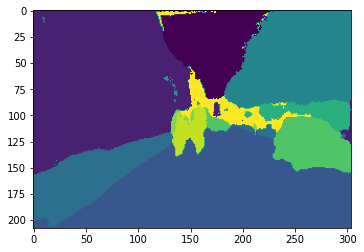

In [1]:
from keras_segmentation.models.unet import mobilenet_unet
import matplotlib.pyplot as plt

# Loading mobilenet unet model
model = mobilenet_unet(n_classes=12, input_height=416, input_width=608)

# Training mobilenet unet model
model.train(
    train_images =  "dataset/images_prepped_train/",
    train_annotations = "dataset/annotations_prepped_train",
    checkpoints_path = "/tmp/mobilenet_unet_1" , epochs=1
)

# Predict the segmentation of single test image using trained mobilenet segnet
out = model.predict_segmentation(
    inp="dataset/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

# Show the predicted output
plt.imshow(out)

# Evaluate the mobilenet segnet segmentation model 
print(model.evaluate_segmentation(inp_images_dir="dataset/images_prepped_test/", 
                                  annotations_dir="dataset/annotations_prepped_test/"))